### 1. Leer el archivo

In [1]:
import pandas as pd

df = pd.read_csv("finanzas2020[1].csv", sep="\t", skipinitialspace=True)
df.head()

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,-760,343,265,-624,-390,-796,601,-780,-491,645,-248,714
1,223,491,-397,-123,6,-115,157,-741,-951,267,14,-596
2,-872,-913,558,278,544,-223,607,-113,348,576,-977,195
3,111,-842,730,-761,158,-963,-290,-669,191,130,170,-274
4,919,111,-688,15,395,9,553,297,-302,695,730,-731


### 2. Cleaning data

In [2]:
df.dtypes

Enero         object
Febrero        int64
Marzo          int64
Abril          int64
Mayo           int64
Junio          int64
Julio         object
Agosto         int64
Septiembre    object
Octubre       object
Noviembre     object
Diciembre      int64
dtype: object

In [3]:
try:
    print("1. All string will be replaced by 0")
    for column in df:
        df[column] = df[column].str.replace('[^0-9]', '', regex=True).astype(int)
except Exception as e:
    print("2.", e, "All string will be replaced by 0")
    for column in df:
        df[column] = df[column].replace(regex='([a-zA-Z])', value=int(0))
else:
    print("3. All missing values will be replaced by 0")
    df.fillna(int(0))
finally:
    print("4. All negative numeric string values will be converted into INT")
    for column in df:
        df[column] = df[column].replace("'",'', regex=True).astype(int)

1. All string will be replaced by 0
2. Can only use .str accessor with string values! All string will be replaced by 0
4. All negative numeric string values will be converted into INT


In [4]:
df.dtypes

Enero         int32
Febrero       int32
Marzo         int32
Abril         int32
Mayo          int32
Junio         int32
Julio         int32
Agosto        int32
Septiembre    int32
Octubre       int32
Noviembre     int32
Diciembre     int32
dtype: object

In [5]:
df.sum()

Enero         47847
Febrero          39
Marzo         -7969
Abril        -18933
Mayo          10304
Junio         -1477
Julio          7698
Agosto        -8735
Septiembre   -10948
Octubre        3412
Noviembre      1157
Diciembre     -3044
dtype: int64

### 3. Qué mes se ha gastado más? 

In [6]:
df_min = df.sum()
print(f"Maximum ahorado {df_min.min()} fue en: {df_min.idxmin(axis=0)}")

Maximum ahorado -18933 fue en: Abril


### Qué mes se ha ahorrado más? 

In [7]:
df_ahorrado = df.sum()
print(f"Maximum ahorado {df_ahorrado.max()} fue en: {df_ahorrado.idxmax(axis=0)}")

Maximum ahorado 47847 fue en: Enero


### 4. Cuál es la media de gastos al año?

 Aqui tenemos en cuenta solo los gastos (numeros negativos) evitando los numeros positivos

In [8]:
df_media = df[df<0].sum().mean()
print("La medida de los gastos anuales es", round(df_media, 2))

La medida de los gastos anuales es -23314.33


### 5. Cuál ha sido el gasto total a lo largo del año?

In [9]:
df_total = df[df<0].sum().sum()
print("Total de los gastos anuales es", round(df_total, 2))

Total de los gastos anuales es -279772.0


### 6. Cuáles han sido los ingresos totales a lo largo del año??

In [10]:
df_ing_total = df[df>0].sum().sum()
print("Total de los ingresos anuales es", round(df_ing_total, 2))

Total de los ingresos anuales es 299123.0


### 7. Opcional: Realice una gráfica de la evolución de ingresos a lo largo del año?

<AxesSubplot: title={'center': 'La evolucion de ingresos a lo largo del año'}>

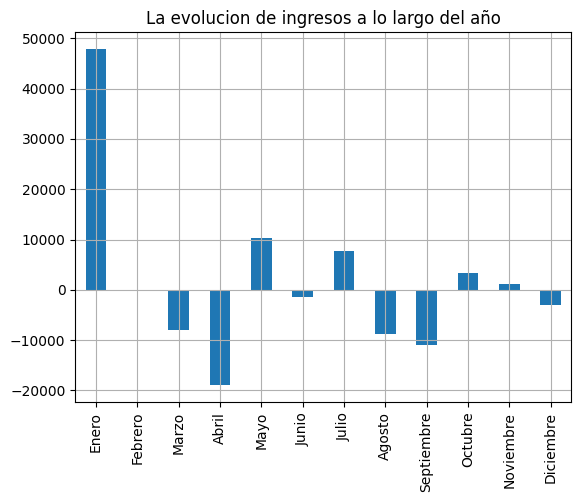

In [25]:
df.sum().plot(title="La evolucion de ingresos a lo largo del año", kind="bar", grid=True)